In [14]:
import numpy as np
import pandas as pd

data = pd.read_csv("covid_19_india(1).csv")
print(data.shape)
data.head()

(2134, 9)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3


In [15]:
gujarat_y = []
rajasthan_y = []

tempsum_gujarat = 0
tempsum_rajasthan = 0
for i in range(0, len(data)):
        if data.iloc[i, 3] == "Gujarat":
            tempsum_gujarat = data.iloc[i, 8]
            gujarat_y.append(tempsum_gujarat)
        if data.iloc[i, 3] == "Rajasthan":
            tempsum_rajasthan = data.iloc[i, 8]
            rajasthan_y.append(tempsum_rajasthan)
        
print("Gujarat cases up to 20/05/2020: {}".format(gujarat_y[len(gujarat_y) - 1]))
print("Rajasthan cases up to 20/05/2020: {}".format(rajasthan_y[len(rajasthan_y) - 1]))
len(rajasthan_y)

Gujarat cases up to 20/05/2020: 12140
Rajasthan cases up to 20/05/2020: 5845


79

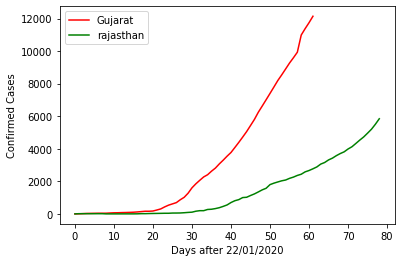

In [16]:
import matplotlib.pyplot as plt

plt.ylabel("Confirmed Cases")
plt.xlabel("Days after 22/01/2020")

plt.plot(gujarat_y, color='red', label='Gujarat')
plt.plot(rajasthan_y, color='green', label='rajasthan')
plt.legend()
plt.show()

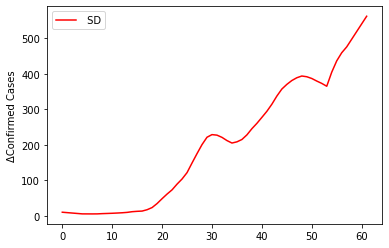

62


In [17]:
from scipy.signal import savgol_filter

deriv_gujarat = savgol_filter(gujarat_y, 9, 2, 1) #Polynomial degree is 2 since the function should look like a parabola

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_gujarat, color='red', label=" SD")
plt.legend()
plt.show()
print(len(gujarat_y))

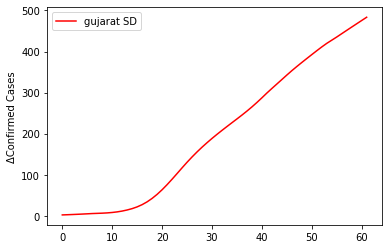

62

In [18]:
from scipy.signal import savgol_filter

deriv_gujarat = savgol_filter(gujarat_y, int(((len(gujarat_y))+1)/3), 2, 1) #Polynomial degree is 2 since the function should look like a parabola
deriv_gujarat = savgol_filter(deriv_gujarat, int((len(gujarat_y)+3)/5), 2, 0)
#deriv_gujarat = savgol_filter(deriv_gujarat, int((len(gujarat_y)+2)/7), 2, 0)
#deriv_gujarat = savgol_filter(deriv_gujarat, int((len(gujarat_y))/9), 2, 0)

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_gujarat, color='red', label="gujarat SD")
plt.legend()
plt.show()
len(deriv_gujarat)

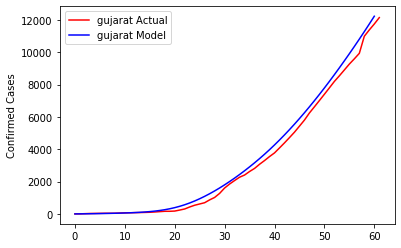

In [19]:
from scipy import integrate

gujarat_y_pred = integrate.cumtrapz(deriv_gujarat) 

plt.ylabel("Confirmed Cases")

plt.plot(gujarat_y, color='red', label="gujarat Actual")
plt.plot(gujarat_y_pred, color='blue', label='gujarat Model')
plt.legend()
plt.show()

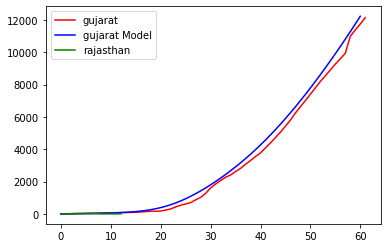

In [20]:
rajasthan_y = rajasthan_y[:13]
deriv_rajasthan = savgol_filter(rajasthan_y, 7, 2, 1)
deriv_rajasthan = savgol_filter(deriv_rajasthan, 9, 2, 0)

plt.plot(gujarat_y, color='red', label='gujarat')
plt.plot(gujarat_y_pred, color='blue', label="gujarat Model")
plt.plot(rajasthan_y, color='green', label='rajasthan')
plt.legend()
plt.show()

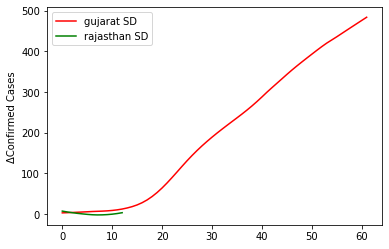

13

In [21]:
plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_gujarat, color='red', label='gujarat SD')
plt.plot(deriv_rajasthan, color='green', label='rajasthan SD')
plt.legend()
plt.show()
len(deriv_rajasthan)

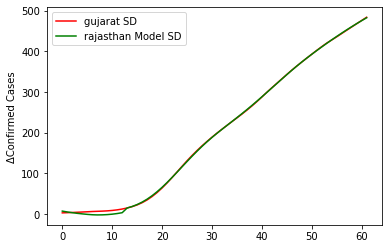

In [22]:
rajasthan_derv_model = np.roll(deriv_gujarat, 1)
rajasthan_derv_model = savgol_filter(deriv_gujarat, 19, 2, 0)
rajasthan_basic_model= []
for i in range(13):
    rajasthan_basic_model.append(deriv_rajasthan[i])

for i in range(13, len(rajasthan_derv_model)):
    rajasthan_basic_model.append(rajasthan_derv_model[i])

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_gujarat, color='red', label="gujarat SD")
plt.plot(rajasthan_basic_model, color='green', label='rajasthan Model SD')
plt.legend()
plt.show()

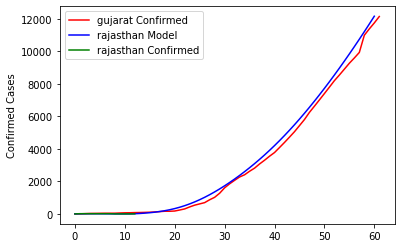

array([5.73953824e+00, 9.54040404e+00, 1.16493506e+01, 1.23131313e+01,
       1.17003453e+01, 1.00065708e+01, 7.63610596e+00, 5.13084931e+00,
       3.00000000e+00, 1.70529272e+00, 1.72771078e+00, 3.54823748e+00,
       1.21921249e+01, 2.84918352e+01, 4.90313137e+01, 7.49527120e+01,
       1.07500506e+02, 1.47950309e+02, 1.97544857e+02, 2.57436655e+02,
       3.28629387e+02, 4.11933743e+02, 5.07938225e+02, 6.16982152e+02,
       7.39151321e+02, 8.74303453e+02, 1.02210349e+03, 1.18206989e+03,
       1.35363212e+03, 1.53619152e+03, 1.72918929e+03, 1.93216759e+03,
       2.14483411e+03, 2.36707760e+03, 2.59891826e+03, 2.84046108e+03,
       3.09187899e+03, 3.35340162e+03, 3.62527833e+03, 3.90774190e+03,
       4.20098165e+03, 4.50512337e+03, 4.82022584e+03, 5.14628801e+03,
       5.48325689e+03, 5.83099435e+03, 6.18924637e+03, 6.55768720e+03,
       6.93597782e+03, 7.32379992e+03, 7.72088005e+03, 8.12696572e+03,
       8.54190017e+03, 8.96555034e+03, 9.39770420e+03, 9.83814969e+03,
      

In [23]:
rajasthan_basic_model_confirmed = integrate.cumtrapz(rajasthan_basic_model)

plt.ylabel("Confirmed Cases")

plt.plot(gujarat_y, color='red', label='gujarat Confirmed')
plt.plot(rajasthan_basic_model_confirmed, color='blue', label='rajasthan Model')
plt.plot(rajasthan_y, color='green', label='rajasthan Confirmed')
plt.legend()
plt.show()
rajasthan_basic_model_confirmed

In [11]:
import time

predictions = pd.DataFrame(columns = ["Date", "Predicted Cases"])

start_pred = 1590019200
for i in range(46, len(rajasthan_basic_model_confirmed)):
    t = time.strftime('%Y-%m-%d', time.localtime(start_pred))
    pred = rajasthan_basic_model_confirmed[i]
    predictions.at[i-46, "Date"] = t
    predictions.at[i-46, "Predicted Cases"] = int(pred)
    start_pred = start_pred + 24*60*60
    
predictions

,Date,Predicted Cases
0,2020-05-21,6189
1,2020-05-22,6557
2,2020-05-23,6935
3,2020-05-24,7323
4,2020-05-25,7720
5,2020-05-26,8126
6,2020-05-27,8541
7,2020-05-28,8965
8,2020-05-29,9397
9,2020-05-30,9838
